### Load Functions

In [1]:
import pandas as pd

from simple_trade import download_data, compute_indicator
from simple_trade import CrossTradeBacktester
from simple_trade import BacktestPlotter

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Load Backtest Configuration

In [2]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
short_window = 25
long_window = 75
initial_cash = 10000.0
commission = 0.01
short_borrow_fee_inc_rate = 0.00001

### Load Data and Indicators

In [3]:
data = download_data(symbol, start_date, end_date, interval=interval)
data.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,72.716064,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.009125,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.582909,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.241531,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.403664,75.797501,76.110001,74.290001,74.290001,132079200


In [4]:
data = compute_indicator(data, indicator='sma', window=short_window)
data.tail(5)

Computing SMA...


Price,Adj Close,Close,High,Low,Open,Volume,SMA_25
Date,,,,,,,
2022-12-23,130.344482,131.860001,132.419998,129.639999,130.919998,63814900,142.4752
2022-12-27,128.535522,130.029999,131.410004,128.720001,131.380005,69007800,141.6248
2022-12-28,124.591385,126.040001,131.029999,125.870003,129.669998,85438400,140.7460
2022-12-29,128.120346,129.610001,130.479996,127.730003,127.989998,75703700,139.9232
2022-12-30,128.436661,129.929993,129.949997,127.430000,128.410004,77034200,139.0776


In [5]:
data = compute_indicator(data, indicator='sma', window=long_window)
data.tail(5)

Computing SMA...


Price,Adj Close,Close,High,Low,Open,Volume,SMA_25,SMA_75
Date,,,,,,,,
2022-12-23,130.344482,131.860001,132.419998,129.639999,130.919998,63814900,142.4752,145.628399
2022-12-27,128.535522,130.029999,131.410004,128.720001,131.380005,69007800,141.6248,145.263866
2022-12-28,124.591385,126.040001,131.029999,125.870003,129.669998,85438400,140.7460,144.765332
2022-12-29,128.120346,129.610001,130.479996,127.730003,127.989998,75703700,139.9232,144.442266
2022-12-30,128.436661,129.929993,129.949997,127.430000,128.410004,77034200,139.0776,144.103866


### Long Only Trading Backtest

In [6]:
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission, 
commission_short=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="SMA_25",
    long_window_indicator="SMA_75",
    price_col='Close',
)

In [7]:
pd.DataFrame(results, index=range(1))

,strategy,short_window_indicator,long_window_indicator,initial_cash,final_value,total_return_pct,num_trades,benchmark_strategy,benchmark_initial_cash,benchmark_shares,benchmark_buy_price,benchmark_final_price,benchmark_final_value,benchmark_return_pct,start_date,end_date,duration_days,days_in_backtest,years,annualized_return_pct,annualized_volatility_pct,sharpe_ratio,sortino_ratio,calmar_ratio,max_drawdown_pct,avg_drawdown_pct,max_drawdown_duration_days,avg_drawdown_duration_days,total_commissions
0,Cross Trade (SMA_25/SMA_75),SMA_25,SMA_75,10000.0,11400.77,14.01,16,Buy and Hold,10000.0,131.859363,75.087502,129.929993,17132.49,71.32,2020-04-20,2022-12-30,984,682,2.71,4.96,23.75,0.32,0.26,0.15,-33.59,-15.36,849,61.33,1936.74


In [8]:
backtester.print_results(results)


              ✨ Cross Trade (SMA_25/SMA_75) ✨               

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Days: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $11,400.77
  • Total Return: 14.01%
  • Annualized Return: 4.96%
  • Number of Trades: 16
  • Total Commissions: $1,936.74

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -57.31%

📉 RISK METRICS:
  • Sharpe Ratio: 0.320
  • Sortino Ratio: 0.260
  • Maximum Drawdown: -33.59%
  • Average Drawdown: -15.36%
  • Max Drawdown Duration: 849 days
  • Avg Drawdown Duration: 61.33 days
  • Annualized Volatility: 23.75%



In [9]:
portfolio.tail(5)

,Price,Close,Cash,PositionSize,PositionValue,PositionType,PortfolioValue,CommissionPaid,ShortFee,LongFee,BuySignal,SellSignal,Action,PositionCostBasis
Date,,,,,,,,,,,,,,
2022-12-23,131.860001,131.860001,11400.768698,0,0.0,none,11400.768698,0.0,0.0,0.0,False,False,HOLD,0.0
2022-12-27,130.029999,130.029999,11400.768698,0,0.0,none,11400.768698,0.0,0.0,0.0,False,False,HOLD,0.0
2022-12-28,126.040001,126.040001,11400.768698,0,0.0,none,11400.768698,0.0,0.0,0.0,False,False,HOLD,0.0
2022-12-29,129.610001,129.610001,11400.768698,0,0.0,none,11400.768698,0.0,0.0,0.0,False,False,HOLD,0.0
2022-12-30,129.929993,129.929993,11400.768698,0,0.0,none,11400.768698,0.0,0.0,0.0,False,False,HOLD,0.0


In [10]:
portfolio.loc[portfolio["Action"]!="HOLD",:]

,Price,Close,Cash,PositionSize,PositionValue,PositionType,PortfolioValue,CommissionPaid,ShortFee,LongFee,BuySignal,SellSignal,Action,PositionCostBasis
Date,,,,,,,,,,,,,,
2020-05-13,76.912498,76.912498,1066.613302,115,0.000000,long,10000.000000,88.449373,0.0,0.0,True,False,BUY,76.912498
2020-11-18,118.029999,118.029999,14504.328663,0,13573.449860,none,14640.063162,135.734499,0.0,0.0,False,True,SELL,0.000000
2020-12-07,123.750000,123.750000,1505.628663,104,0.000000,long,14504.328663,128.700000,0.0,0.0,True,False,BUY,123.750000
2021-03-11,121.959999,121.959999,14062.630169,0,12683.839905,none,14189.468568,126.838399,0.0,0.0,False,True,SELL,0.000000
2021-04-29,133.479996,133.479996,1524.854170,93,0.000000,long,14062.630169,124.136396,0.0,0.0,True,False,BUY,133.479996
2021-06-09,127.129997,127.129997,13229.713017,0,11823.089745,none,13347.943915,118.230897,0.0,0.0,False,True,SELL,0.000000
2021-06-23,133.699997,133.699997,1346.457289,88,0.000000,long,13229.713017,117.655997,0.0,0.0,True,False,BUY,133.699997
2021-10-12,141.509995,141.509995,13674.808010,0,12452.879517,none,13799.336805,124.528795,0.0,0.0,False,True,SELL,0.000000
2021-11-11,147.869995,147.869995,1428.215014,82,0.000000,long,13674.808010,121.253396,0.0,0.0,True,False,BUY,147.869995


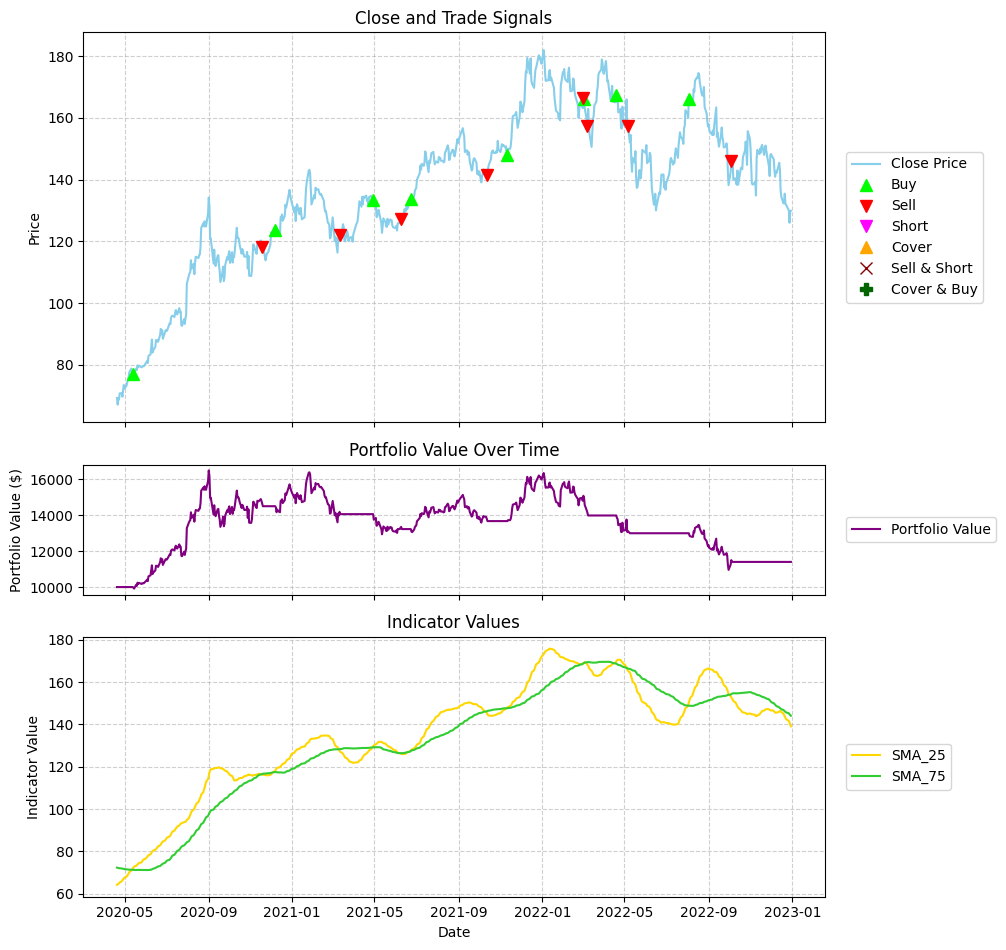

In [11]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Long Only) (SMA-{short_window} vs SMA-{long_window})"
)

### Short Only Trading Backtest

In [12]:
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission, commission_short=commission,
short_borrow_fee_inc_rate=short_borrow_fee_inc_rate)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="SMA_25",
    long_window_indicator="SMA_75",
    price_col='Close',
    trading_type = 'short'
)

In [13]:
portfolio.loc[portfolio["Action"]!="Hold",:]

,Price,Close,Cash,PositionSize,PositionValue,PositionType,PortfolioValue,CommissionPaid,ShortFee,LongFee,BuySignal,SellSignal,Action,PositionCostBasis
Date,,,,,,,,,,,,,,
2020-04-20,69.232498,69.232498,10000.000000,0,0.000000,none,10000.000000,0.0,0.000000,0.0,False,False,HOLD,0.000000
2020-04-21,67.092499,67.092499,10000.000000,0,0.000000,none,10000.000000,0.0,0.000000,0.0,False,False,HOLD,0.000000
2020-04-22,69.025002,69.025002,10000.000000,0,0.000000,none,10000.000000,0.0,0.000000,0.0,False,False,HOLD,0.000000
2020-04-23,68.757500,68.757500,10000.000000,0,0.000000,none,10000.000000,0.0,0.000000,0.0,False,False,HOLD,0.000000
2020-04-24,70.742500,70.742500,10000.000000,0,0.000000,none,10000.000000,0.0,0.000000,0.0,False,False,HOLD,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,131.860001,10401.554749,-6,791.160004,short,9610.394746,0.0,0.007912,0.0,False,False,HOLD,146.100006
2022-12-27,130.029999,130.029999,10401.546947,-6,780.179993,short,9621.366955,0.0,0.007802,0.0,False,False,HOLD,146.100006
2022-12-28,126.040001,126.040001,10401.539385,-6,756.240005,short,9645.299380,0.0,0.007562,0.0,False,False,HOLD,146.100006


In [14]:
backtester.print_results(results)


      ✨ Cross Trade (SMA_25/SMA_75) [Shorts Allowed] ✨      

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Days: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $9,621.94
  • Total Return: -3.78%
  • Annualized Return: -1.41%
  • Number of Trades: 15
  • Total Commissions: $139.70

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -75.10%

📉 RISK METRICS:
  • Sharpe Ratio: -0.800
  • Sortino Ratio: -0.740
  • Maximum Drawdown: -5.55%
  • Average Drawdown: -3.03%
  • Max Drawdown Duration: 766 days
  • Avg Drawdown Duration: 385.0 days
  • Annualized Volatility: 1.77%



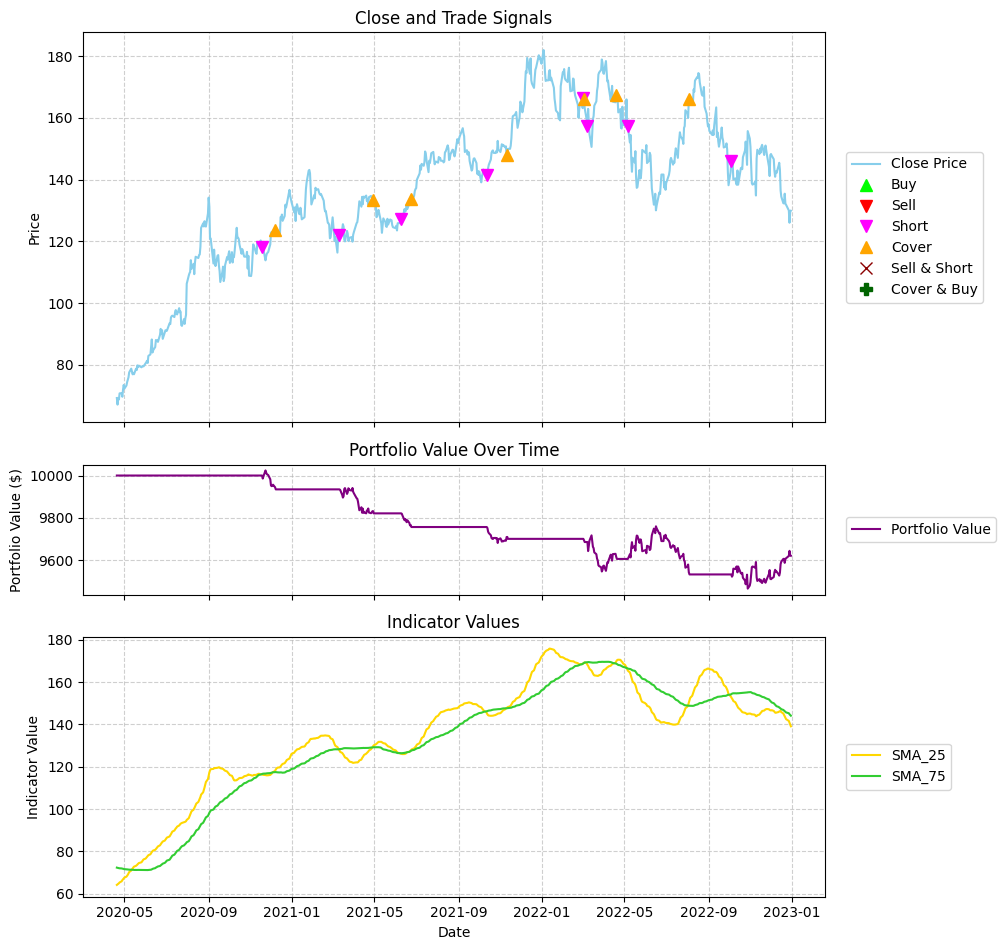

In [15]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Short Only) (SMA-{short_window} vs SMA-{long_window})"
)

### Mixed Trading Backtest (1st Scenario)

In [16]:
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission, 
commission_short=commission, short_borrow_fee_inc_rate=short_borrow_fee_inc_rate)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="SMA_25",
    long_window_indicator="SMA_75",
    price_col='Close',
    trading_type = 'mixed'
)

In [17]:
backtester.print_results(results)


      ✨ Cross Trade (SMA_25/SMA_75) [Shorts Allowed] ✨      

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Days: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $10,956.28
  • Total Return: 9.56%
  • Annualized Return: 3.43%
  • Number of Trades: 31
  • Total Commissions: $2,079.89

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -61.76%

📉 RISK METRICS:
  • Sharpe Ratio: 0.260
  • Sortino Ratio: 0.190
  • Maximum Drawdown: -36.78%
  • Average Drawdown: -17.35%
  • Max Drawdown Duration: 849 days
  • Avg Drawdown Duration: 61.33 days
  • Annualized Volatility: 23.81%



In [18]:
portfolio.loc[portfolio["Action"]!="HOLD",:]

,Price,Close,Cash,PositionSize,PositionValue,PositionType,PortfolioValue,CommissionPaid,ShortFee,LongFee,BuySignal,SellSignal,Action,PositionCostBasis
Date,,,,,,,,,,,,,,
2020-05-13,76.912498,76.912498,1066.613302,115,0.000000,long,10000.000000,88.449373,0.000000,0.0,True,False,BUY,76.912498
2020-11-18,118.029999,118.029999,15906.525049,-12,13573.449860,short,14640.063162,149.898098,0.000000,0.0,False,True,SELL AND SHORT,118.029999
2020-12-07,123.750000,123.750000,1532.790780,103,1485.000000,long,14421.353280,142.312500,0.014850,0.0,True,False,COVER AND BUY,123.750000
2021-03-11,121.959999,121.959999,15297.196276,-11,12561.879906,short,14094.670685,139.034399,0.000000,0.0,False,True,SELL AND SHORT,121.959999
2021-04-29,133.479996,133.479996,1410.794509,92,1468.279953,long,13828.438512,137.484396,0.014683,0.0,True,False,COVER AND BUY,133.479996
2021-06-09,127.129997,127.129997,14248.381632,-10,11695.959747,short,13106.754257,129.672597,0.000000,0.0,False,True,SELL AND SHORT,127.129997
2021-06-23,133.699997,133.699997,1419.736329,85,1336.999969,long,12911.251066,127.014997,0.013370,0.0,True,False,COVER AND BUY,133.699997
2021-10-12,141.509995,141.509995,14588.656418,-9,12028.349533,short,13448.085862,133.019395,0.000000,0.0,False,True,SELL AND SHORT,141.509995
2021-11-11,147.869995,147.869995,1445.676845,79,1330.829956,long,13257.532055,130.125596,0.013308,0.0,True,False,COVER AND BUY,147.869995


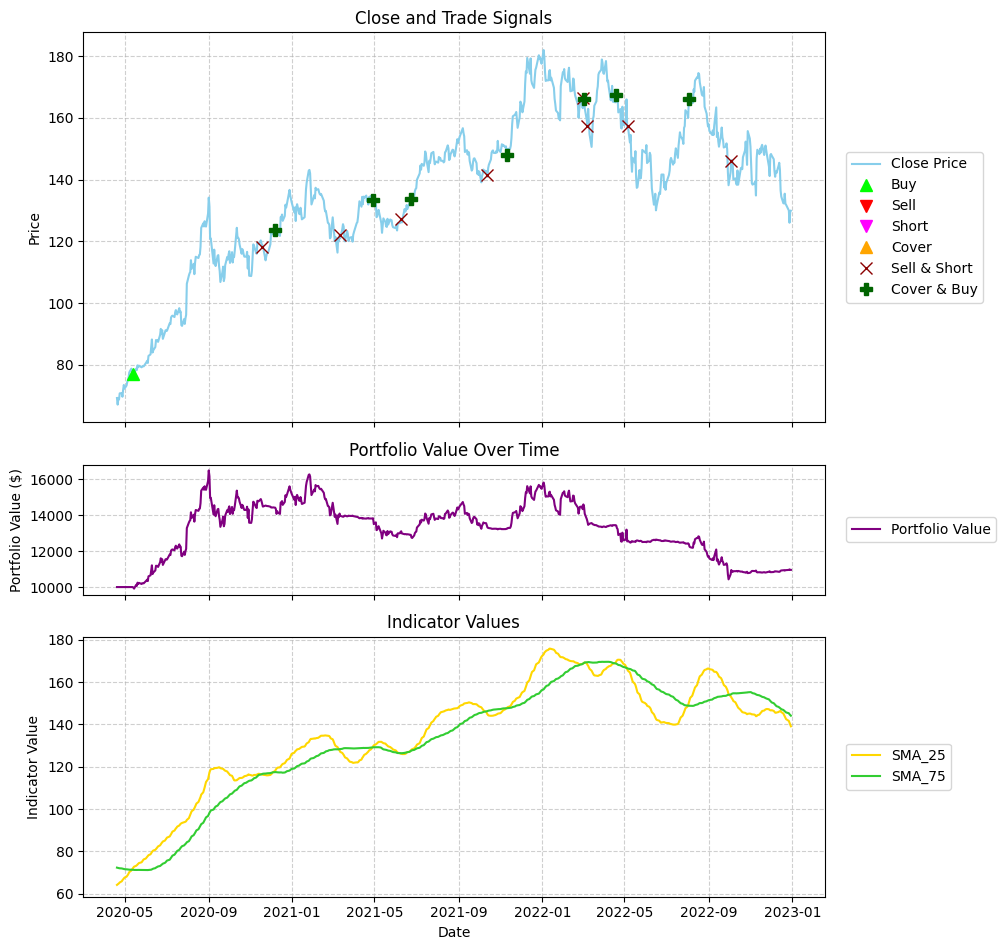

In [19]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Mixed Trading) (SMA-{short_window} vs SMA-{long_window})"
)

### Mixed Trading Backtest (2nd Scenario)

In [20]:
short_window = 25
long_window = 150

data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data, indicator='sma', window=short_window)
data = compute_indicator(data, indicator='sma', window=long_window)

Computing SMA...
Computing SMA...


In [21]:
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission, 
commission_short=commission, short_borrow_fee_inc_rate=short_borrow_fee_inc_rate)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="SMA_25",
    long_window_indicator="SMA_150",
    price_col='Close',
    trading_type = 'mixed'
)

backtester.print_results(results)


     ✨ Cross Trade (SMA_25/SMA_150) [Shorts Allowed] ✨      

🗓️ BACKTEST PERIOD:
  • Period: 2020-08-05 to 2022-12-30
  • Duration: 877 days
  • Trading Days: 607

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $7,783.27
  • Total Return: -22.17%
  • Annualized Return: -9.88%
  • Number of Trades: 13
  • Total Commissions: $557.55

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -93.49%

📉 RISK METRICS:
  • Sharpe Ratio: -0.510
  • Sortino Ratio: -0.620
  • Maximum Drawdown: -36.44%
  • Average Drawdown: -13.68%
  • Max Drawdown Duration: 360 days
  • Avg Drawdown Duration: 51.17 days
  • Annualized Volatility: 17.46%



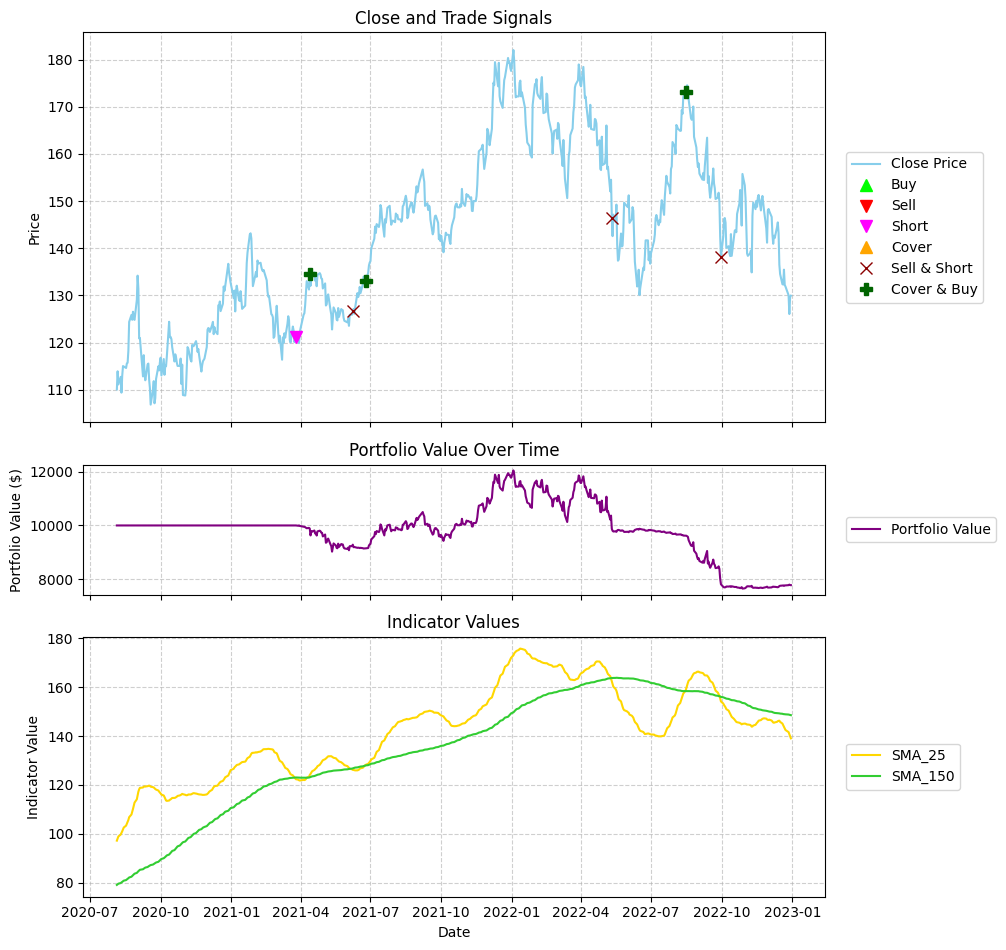

In [22]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Mixed Trading) (SMA-{short_window} vs SMA-{long_window})"
)